In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


<a id = '2' ></a>
## Data Content
* **Age:** Age of the patient
* **Sex:** Sex of the patient
* **exang:** exercise induced angina (1 = yes; 0 = no)
* **ca:** number of major vessels (0-3)
* **cp:** Chest Pain type chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
* **trtbps:** resting blood pressure (in mm Hg)
* **chol:** cholestoral in mg/dl fetched via BMI sensor
* **fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* **rest_ecg:** resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* **thalach:** maximum heart rate achieved
* **target:** 0= less chance of heart attack 1= more chance of heart attack

### Read and Analyse the Data

In [2]:
heart = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
#o2 = pd.read_csv("o2Saturation.csv")

In [3]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
heart.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heart.isnull().sum()
# Datada hiç eksik değer yok. Bu işimizi kolaylaştırır.

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### Explorary Data Analysis

In [7]:
categoric_columns = ["sex","cp","fbs","restecg","exng","slp","caa","thall","output"]
numeric_columns = ["age","trtbps","chol","thalachh","oldpeak"]

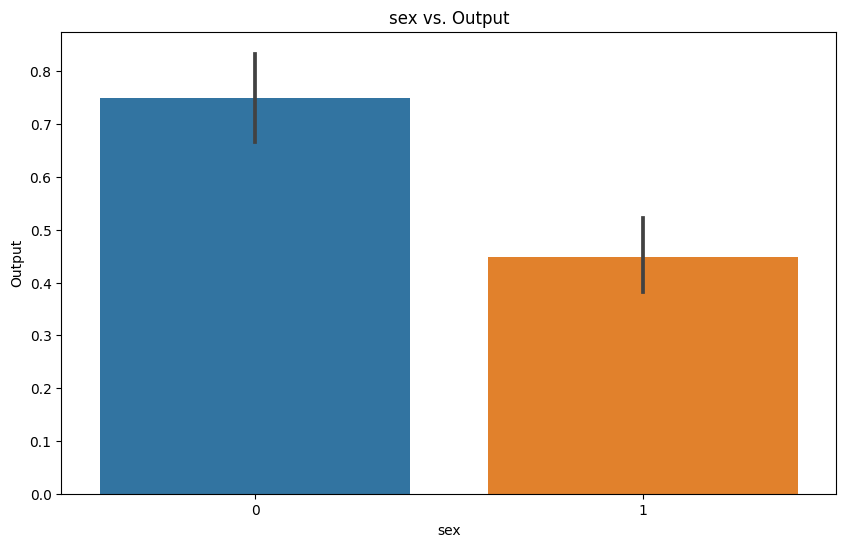

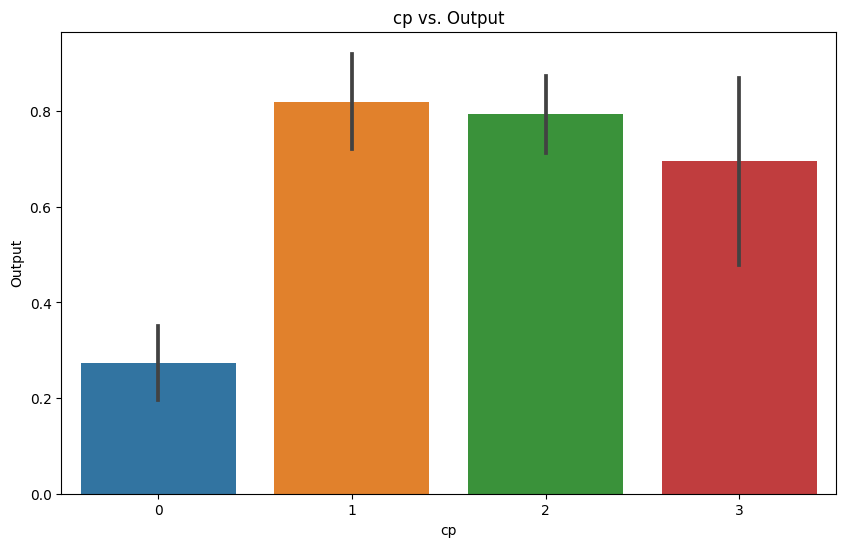

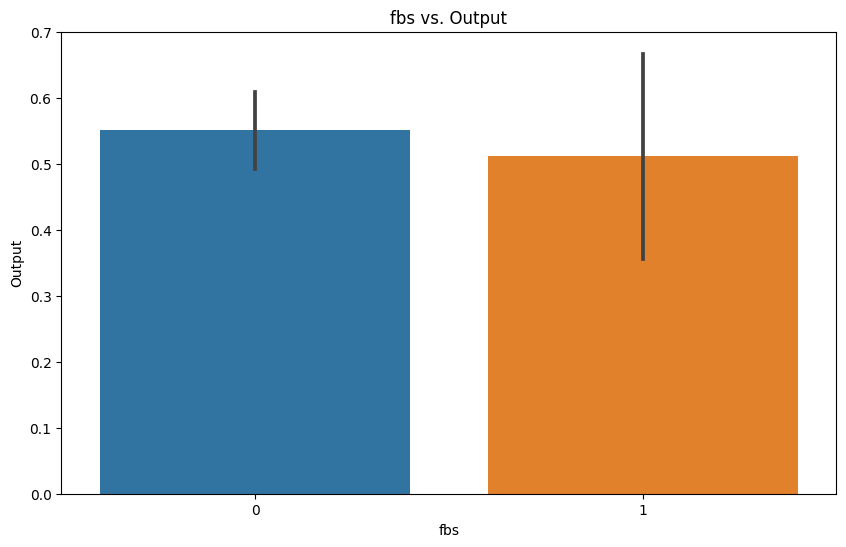

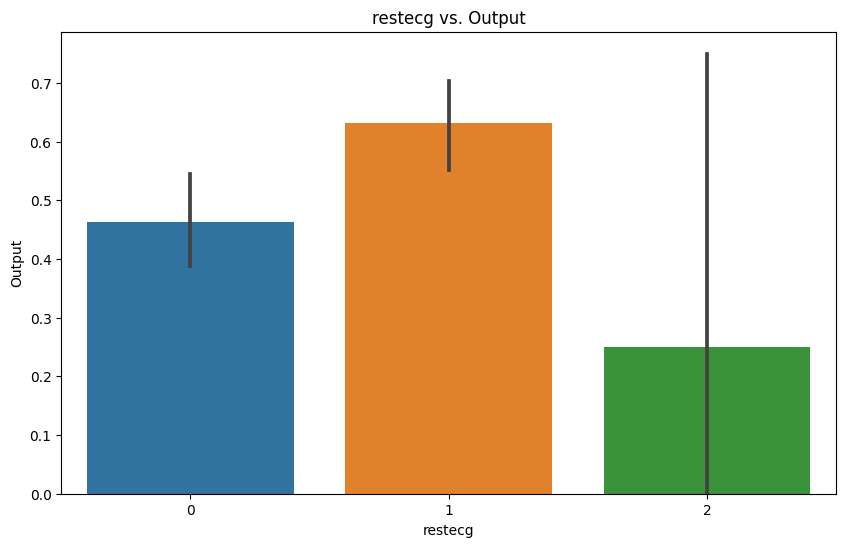

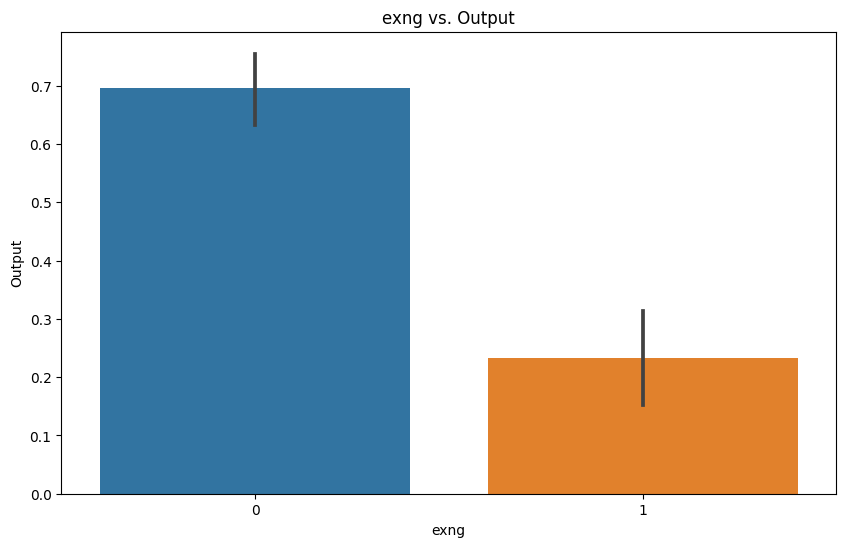

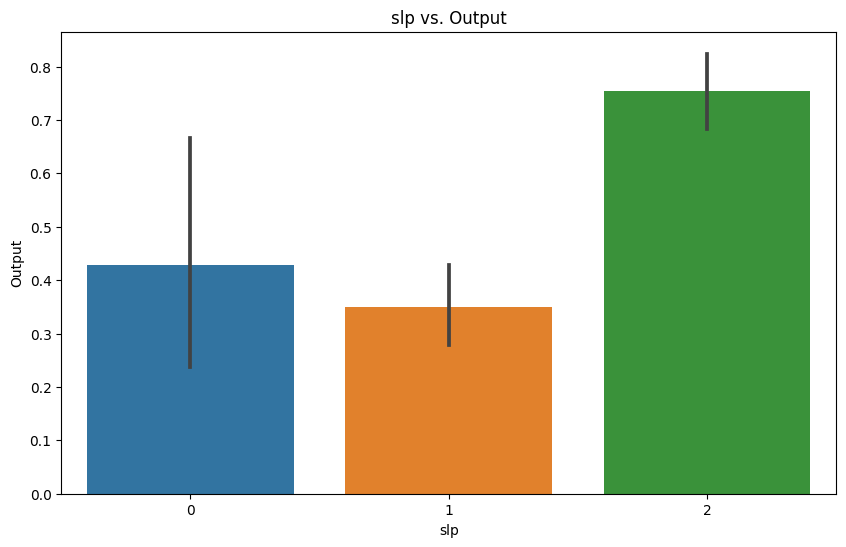

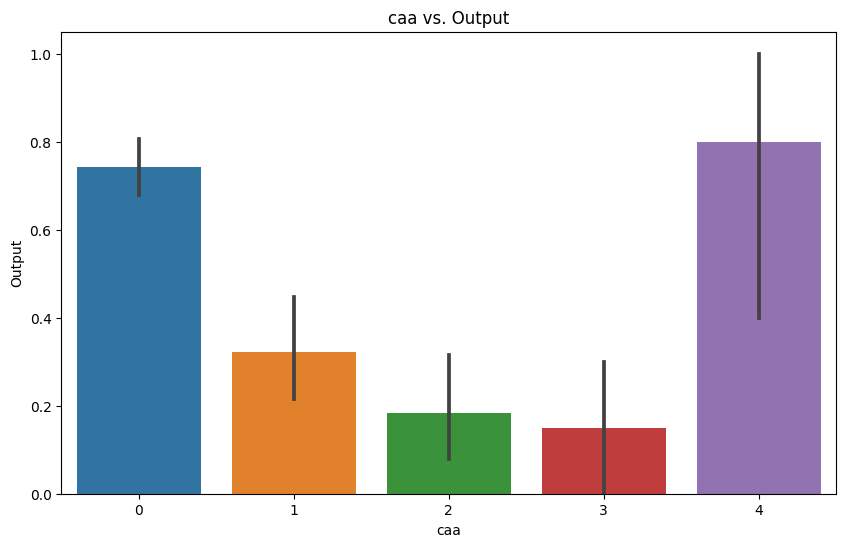

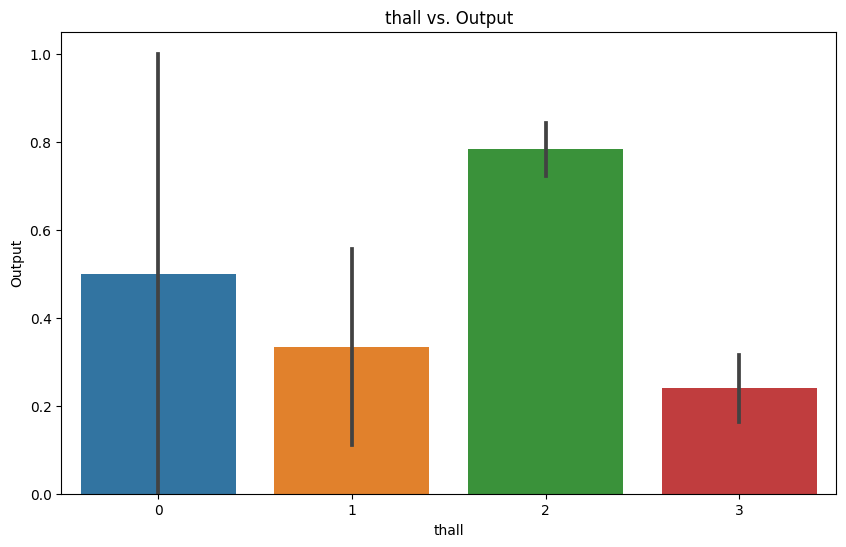

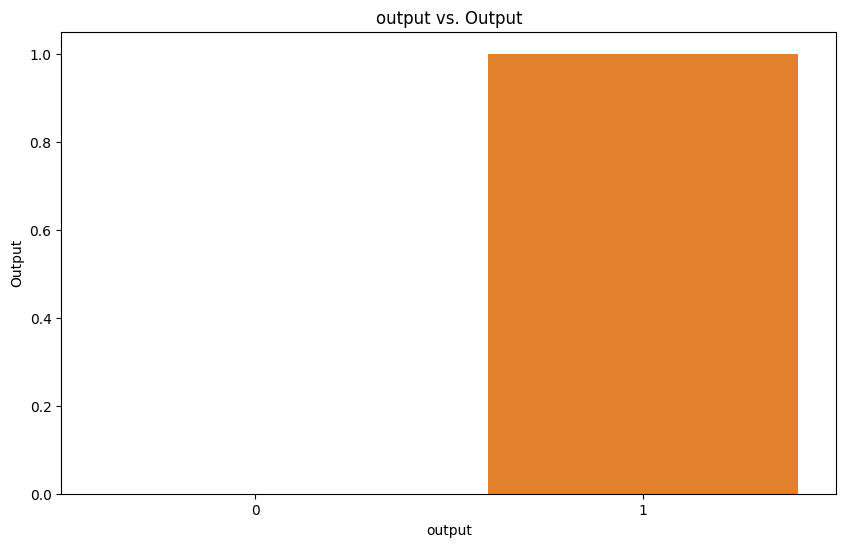

In [8]:
for i in categoric_columns:
    plt.figure(figsize=(10, 6))  # İsteğe bağlı olarak figür boyutunu ayarlayabilirsiniz
    sns.barplot(x=i, y="output", data=heart)
    plt.title(f"{i} vs. Output")  # Grafiğin başlığını ayarlayabilirsiniz
    plt.xlabel(i)  # X ekseni etiketi
    plt.ylabel("Output")  # Y ekseni etiketi
    plt.show()


* The probability of men having a heart attack is higher than that of women.
* Typical angina is a type of chest pain that can generally be considered insignificant in terms of a heart attack.
* In terms of the risk of a heart attack, there is no significant difference between having a blood sugar level greater than 120 and smaller.
* Having ST-T wave abnormality is a high risk factor for a heart attack.
* Having 4 main coronary arteries is the highest risk factor for a heart attack.

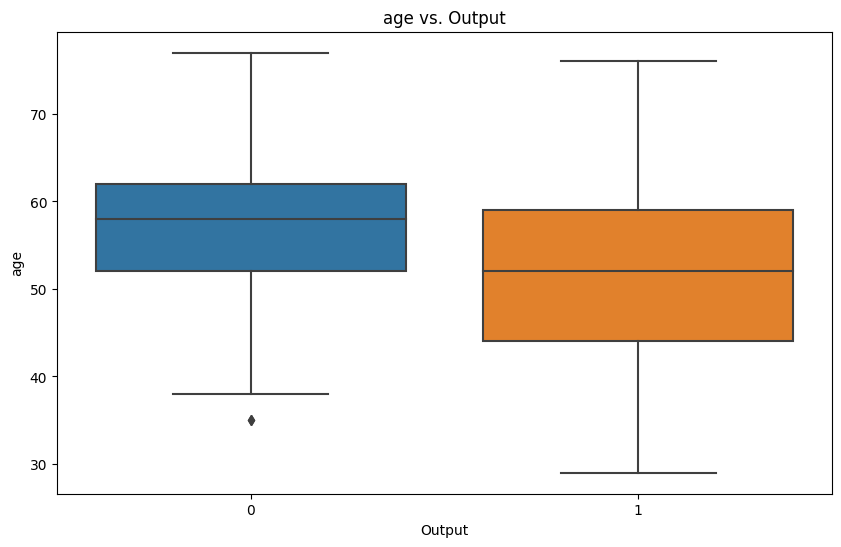

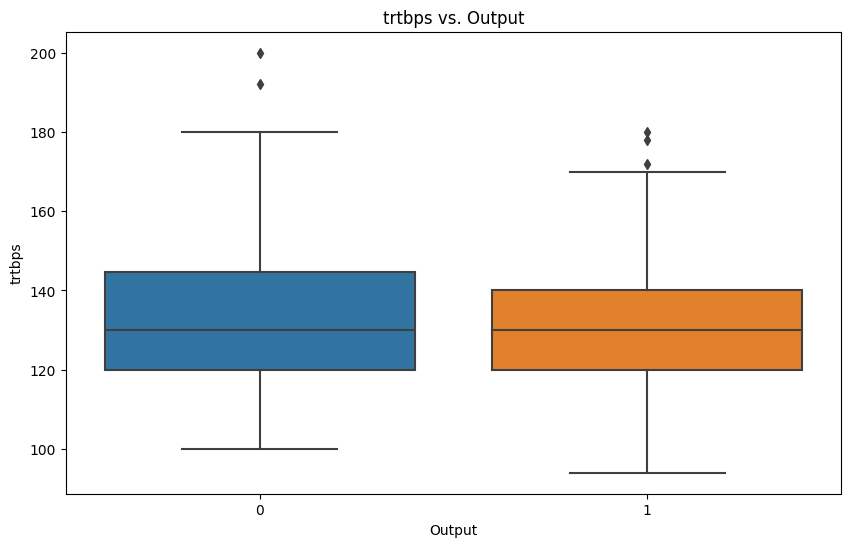

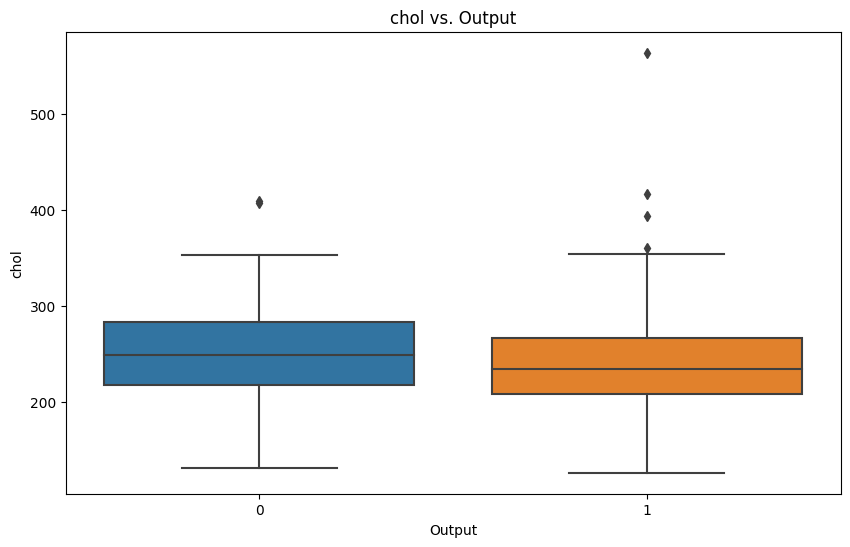

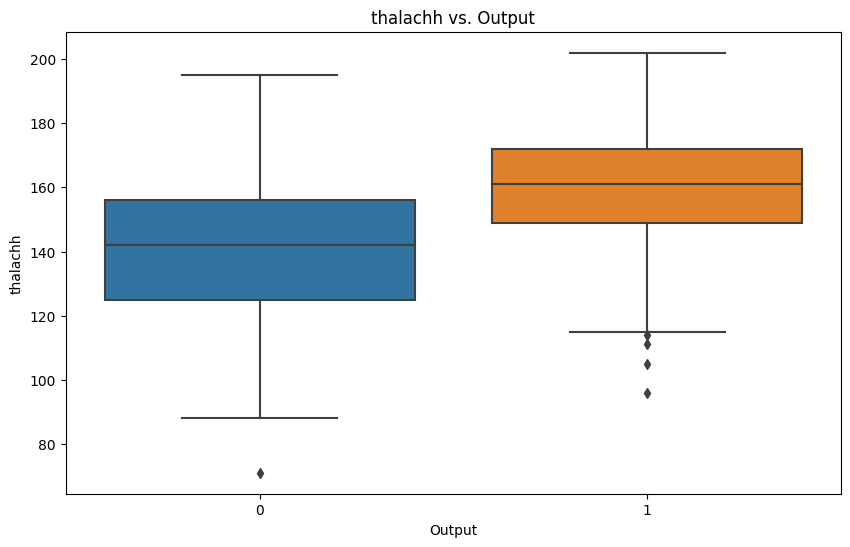

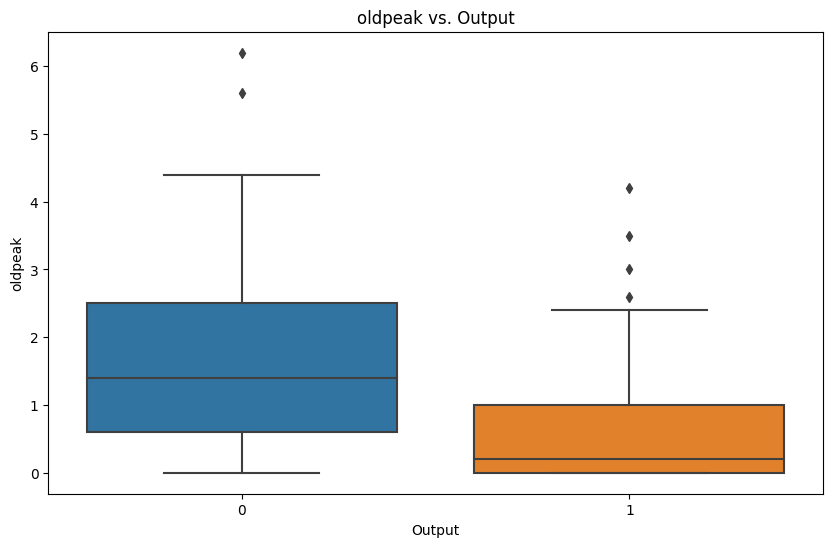

In [9]:
for i in numeric_columns:
    plt.figure(figsize=(10, 6))  # İsteğe bağlı olarak figür boyutunu ayarlayabilirsiniz
    sns.boxplot(x="output", y=i, data=heart)
    plt.title(f"{i} vs. Output")  # Grafiğin başlığını ayarlayabilirsiniz
    plt.ylabel(i)  # X ekseni etiketi
    plt.xlabel("Output")  # Y ekseni etiketi
    plt.show()


* When we examine the boxplots, we can see that there are some outlier values, although not too many. We will clean these in the next step.

* It is observed that the chances of having a heart attack are higher at a young age.

* There is not a significant difference between individuals with low and high resting blood pressure and cholesterol levels; their medians can be considered equal.

* Individuals with a higher maximum heart rate have a higher probability of having a heart attack.

# Outlier Detection

"I tried both the LOF (Local Outlier Factor) and IQR (Interquartile Range) methods for outlier detection and chose to use the IQR method because it provided higher scores. As a result, I decided to delete the outlier values from the dataset."

In [10]:
for i in numeric_columns:
    
    # IQR
    Q1 = np.percentile(heart.loc[:, i],25)
    Q3 = np.percentile(heart.loc[:, i],75)
    
    IQR = Q3 - Q1
    
    print("Old shape: ", heart.loc[:, i].shape)
    
    # upper bound
    upper = np.where(heart.loc[:, i] >= (Q3 +2.5*IQR))
    
    # lower bound
    lower = np.where(heart.loc[:, i] <= (Q1 - 2.5*IQR))
    
    print("{} -- {}".format(upper, lower))
    
    try:
        heart.drop(upper[0], inplace = True)
    except: print("KeyError: {} not found in axis".format(upper[0]))
    
    try:
        heart.drop(lower[0], inplace = True)
    except:  print("KeyError: {} not found in axis".format(lower[0]))
        
    print("New shape: ", heart.shape)

Old shape:  (303,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (303, 14)
Old shape:  (303,)
(array([223, 248]),) -- (array([], dtype=int64),)
New shape:  (301, 14)
Old shape:  (301,)
(array([85]),) -- (array([], dtype=int64),)
New shape:  (300, 14)
Old shape:  (300,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (300, 14)
Old shape:  (300,)
(array([203, 220]),) -- (array([], dtype=int64),)
New shape:  (298, 14)


### Scaling

Standardization to bring numerical values into a common range

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

heart[numeric_columns[:-1]] = scaler.fit_transform(heart[numeric_columns[:-1]])

heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.965901,1,3,0.845093,-0.236684,1,0,0.021855,0,2.3,0,0,1,1
1,-1.902555,1,2,-0.061886,0.119326,0,1,1.639116,0,3.5,0,0,2,1
2,-1.461254,0,1,-0.061886,-0.843995,0,0,0.983470,0,1.4,2,0,2,1
3,0.193624,1,1,-0.666538,-0.173859,0,1,1.245729,0,0.8,2,0,2,1
4,0.303950,0,0,-0.666538,2.297269,0,1,0.590082,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.303950,0,0,0.542767,-0.069150,0,1,-1.158309,1,0.2,1,0,3,0
299,-1.019953,1,3,-1.271190,0.412510,0,1,-0.764921,0,1.2,1,0,3,0
300,1.517527,1,0,0.784628,-1.074354,1,1,-0.371533,0,3.4,1,2,3,0
301,0.303950,1,0,-0.061886,-2.372743,0,1,-1.507987,1,1.2,1,1,3,0


### OneHotEncoding

Converting categorical values into numerical values for use in machine learning.

In [12]:
heart = pd.get_dummies(heart, columns = categoric_columns[:-1], drop_first = True)
heart.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.965901,0.845093,-0.236684,0.021855,2.3,1,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,-1.902555,-0.061886,0.119326,1.639116,3.5,1,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,-1.461254,-0.061886,-0.843995,0.983470,1.4,1,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0.193624,-0.666538,-0.173859,1.245729,0.8,1,True,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.303950,-0.666538,2.297269,0.590082,0.6,1,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False


### Heatmap

A heatmap to visualize the relationships between features.

<Axes: >

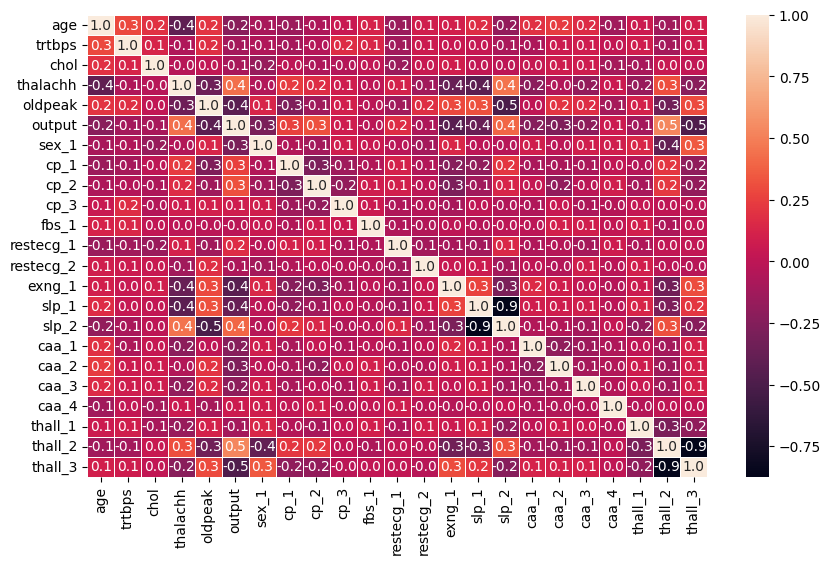

In [13]:
plt.figure(figsize = (10,6))
dff = heart.corr()
sns.heatmap(dff, annot = True, fmt = ".1f", linewidth= 0.7)

### Train - Test Split

In [14]:
from sklearn.model_selection import train_test_split
X = heart.drop("output", axis = 1)
y = heart["output"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

To prevent overfitting, calculating and removing one of the values with high correlation to each other from the data.

In [15]:
def get_redundant_pairs(X_train):
    pairs_to_drop = set()
    cols = X_train.columns
    for i in range(0, X_train.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=1):
    au_corr = X_train.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(X_train)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]
print("Top Absolute Correlations !")
print(get_top_abs_correlations(X_train.select_dtypes(include=['int32','int64']), 10))

Top Absolute Correlations !
slp_1     slp_2       0.888889
thall_2   thall_3     0.871243
oldpeak   slp_2       0.508969
thalachh  slp_2       0.441292
          slp_1       0.438378
age       thalachh    0.436229
thalachh  exng_1      0.434852
sex_1     thall_2     0.405693
thalachh  oldpeak     0.370042
sex_1     thall_3     0.339342
dtype: float64


In [16]:
# I first removed the features slp_1 and thall_2. However, I achieved a higher score by only removing slp_1.
X_train_copy = X_train.drop(["slp_1"], axis = 1)
X_test_copy = X_test.drop(["slp_1"], axis = 1)

### Best Model

Comparing the scores of all models to select the one that gives the highest score.

In [17]:
kfold = StratifiedKFold(n_splits=10)
# Modeling step Test differents algorithms 
random_state = 2
classifiers = [LogisticRegression(),SVC(),RandomForestClassifier(), ExtraTreesClassifier(),GradientBoostingClassifier(),
    KNeighborsClassifier(), CatBoostClassifier(verbose = False),
    XGBClassifier(), LGBMClassifier()]

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train_copy, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["LogisticRegression","SVC", "RandomForest","ExtraTrees","GradientBoosting"
                                                                                      ,"KNeighboors", "CatBoostClassifier",
                                                                                      "XGBClassifier", "LGBMClassifier"]})
cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.840399,0.078897,LogisticRegression
1,0.806341,0.055516,SVC
2,0.789855,0.065599,RandomForest
3,0.810688,0.066824,ExtraTrees
4,0.760145,0.097991,GradientBoosting
5,0.794203,0.065944,KNeighboors
6,0.781522,0.069986,CatBoostClassifier
7,0.764312,0.081921,XGBClassifier
8,0.797826,0.066760,LGBMClassifier


### Model

Training the model using logistic regression, which yielded the highest score.

In [18]:
model = LogisticRegression(random_state=0)

model.fit(X_train_copy, y_train)
predictions = model.predict(X_test_copy)

In [19]:
accuracy = accuracy_score(predictions,y_test)
accuracy

0.9166666666666666

I tried various parameter tuning methods, but the model used before tuning still gave the highest score.